# Ejercicio 1
Dada la función f(x,y) = x / (2x^2 + 3y^2 + 1)  

∂f/∂x = (-2x^2 + 3y^2 + 1) / (2x^2 + 3y^2 + 1)^2

∂f/∂y = (-6xy) / (2x^2 + 3y^2 + 1)^2

a) Indique el vector gradiente para 𝑥 = 1 e 𝑦 = −1  

b) Si a partir de (𝑥 = 0.20; 𝑦 = −1) tuviera que elegir una
dirección en la cual la función crezca, qué acción
tomaría?

i. Incrementar los valores de x e y

ii. Disminuir los valores de x e y

iii. Incrementar el valor de x y disminuir el de y

iv. Disminuir el valor de x e incrementar el de y

c) Una vez elegida la dirección en b), el movimiento a realizar será una fracción del módulo del vector
gradiente. ¿Cuál sería la nueva posición si se considera 𝑎𝑙𝑓𝑎 = 0.1? ¿cuál es el valor de la función en
la nueva ubicación?

d) Considere nuevamente las opciones del inciso b) pero ahora debe buscar una dirección, a partir de
(𝑥 = 0.20; 𝑦 = −1), en la cual la función disminuya ¿cuál sería su elección?

e) Repita lo solicitado en c) para la dirección elegida en d) donde el objetivo fue hallar una ubicación
donde la función tome un valor menor.

f) Utilice la técnica del descenso de gradiente para calcular el valor y la ubicación del mínimo de la
función 𝑓(𝑥, 𝑦) que se observa en la figura.

g) Idem f) para el máximo de la función 𝑓(𝑥, 𝑦).


### a)

In [2]:
import sympy as sp

# Definir variables simbólicas
x, y = sp.symbols("x y")

# Definir la función
f = x / (2 * x**2 + 3 * y**2 + 1)

print(f)

x/(2*x**2 + 3*y**2 + 1)


In [3]:
# Derivadas parciales
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)

# Gradiente
grad_f = sp.Matrix([df_dx, df_dy])
print("Gradiente ∇f =", grad_f)

# Evaluar el gradiente en un punto específico (x=1, y=-1)
grad_at_point = grad_f.subs({x: 1, y: -1})
print("Gradiente en (1,-1) =", grad_at_point.evalf())

∂f/∂x = -4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)
∂f/∂y = -6*x*y/(2*x**2 + 3*y**2 + 1)**2
Gradiente ∇f = Matrix([[-4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)], [-6*x*y/(2*x**2 + 3*y**2 + 1)**2]])
Gradiente en (1,-1) = Matrix([[0.0555555555555556], [0.166666666666667]])


### b) Si a partir de (𝑥 = 0.20; 𝑦 = −1) tuviera que elegir una dirección en la cual la función crezca, qué acción tomaría?

i. Incrementar los valores de x e y  --> Correcta, el gradiente aumenta en x e y

ii. Disminuir los valores de x e y

iii. Incrementar el valor de x y disminuir el de y

iv. Disminuir el valor de x e incrementar el de y

In [4]:
grad_at_point = grad_f.subs({x: 0.20, y: -1})
print("Gradiente en (0.20,-1) =", grad_at_point.evalf())

Gradiente en (0.20,-1) = Matrix([[0.235486351403306], [0.0720876585928489]])


### c) Una vez elegida la dirección en b), el movimiento a realizar será una fracción del módulo del vector gradiente. ¿Cuál sería la nueva posición si se considera 𝑎𝑙𝑓𝑎 = 0.1? ¿cuál es el valor de la función en la nueva ubicación?

Suponiendo un paso de esta forma:
(xnuevo, ynuevo) = (x0, y0) + alfa * ∇f(x0, y0) 

In [5]:
alpha = 0.1
x0, y0 = 0.20, -1
new_position = (x0 + alpha * grad_at_point[0], y0 + alpha * grad_at_point[1])
print("Nueva posición:", new_position)

Nueva posición: (0.223548635140331, -0.992791234140715)


### d) Considere nuevamente las opciones del inciso b) pero ahora debe buscar una dirección, a partir de (𝑥 = 0.20; 𝑦 = −1), en la cual la función disminuya ¿cuál sería su elección?

La idea seria disminuir en x e y.

### e)

In [6]:
alpha = 0.1
x0, y0 = 0.20, -1
new_position = (x0 + alpha * -grad_at_point[0], y0 + alpha * -grad_at_point[1])
print("Nueva posición:", new_position)

Nueva posición: (0.176451364859669, -1.00720876585928)


### f) Utilice la técnica del descenso de gradiente para calcular el valor y la ubicación del mínimo de la función 𝑓(𝑥, 𝑦) que se observa en la figura.

### g) Idem f) para el máximo de la función 𝑓(𝑥, 𝑦).

In [7]:
def gradient_descent(
    starting_point, learning_rate, num_iterations, error_threshold=1e-6
):
    point = sp.Matrix(starting_point)
    for _ in range(num_iterations):
        grad = grad_f.subs({x: point[0], y: point[1]}).evalf()
        point = point - learning_rate * grad
        if grad.norm() < error_threshold:
            break
    return point, f.subs({x: point[0], y: point[1]}).evalf()


# Parámetros
starting_point = (0.20, -1)
learning_rate = 0.1
num_iterations = 100
min_point, min_value = gradient_descent(starting_point, learning_rate, num_iterations)
print("Mínimo en:", min_point)
print("Valor mínimo:", min_value)
max_point, max_value = gradient_descent(starting_point, -learning_rate, num_iterations)
print("Máximo en:", max_point)
print("Valor máximo:", max_value)

Mínimo en: Matrix([[-0.711096959054583], [-0.00193827784364301]])
Valor mínimo: -0.353545812006922
Máximo en: Matrix([[0.708187877814801], [-0.000273726833517454]])
Valor máximo: 0.353552938327043


# Ejercicio 2
El precio de una vivienda está dado por dos factores, la proximidad a centros comerciales, financieros, vías
y demás que se mide a través del factor j, y de la condición misma de la vivienda que se mide por el factor k.
La relación entre estos factores y el precio de la vivienda en un barrio determinado está dada por:

P(j,k) = k^2 - 2jk + 2j^2 + 18j - 20k + 201

donde el precio está dado en miles de dólares.
Utilice la técnica de descenso de gradiente para determinar los valores de j y k que minimizan el precio de
la vivienda.

In [8]:
import sympy as sp

j, k = sp.symbols("j k")
P = k**2 - 2 * j * k + 2 * j**2 + 18 * j - 20 * k + 201

P_grad = [sp.diff(P, j), sp.diff(P, k)]  # gradiente
print(P_grad)


def gradient_descent(
    starting_point, gradient, learning_rate, num_iterations, error_threshold=1e-6
):
    point = sp.Matrix(starting_point)
    for _ in range(num_iterations):
        grad = sp.Matrix(gradient).subs({j: point[0], k: point[1]}).evalf()
        # Restamos el gradiente para minimizar
        point = point - learning_rate * grad
        # Si la longitud del gradiente es menor que el umbral de error, detenemos
        if grad.norm() < error_threshold:
            break
    return point, P.subs({j: point[0], k: point[1]}).evalf()


min_point, min_value = gradient_descent((0, 0), P_grad, 0.1, 1000)

print("Mínimo en:", min_point)
print("Valor mínimo:", min_value)

[4*j - 2*k + 18, -2*j + 2*k - 20]
Mínimo en: Matrix([[0.999999399436555], [10.9999990282679]])
Valor mínimo: 100.000000000000


# Ejercicio 3
A continuación, se presentan datos de entrenamiento y tiempo promedio de un recorrido de corredores
para una distancia fija. Los datos están organizados en una tabla con las horas de entrenamiento semanales
y el tiempo promedio en minutos para completar el recorrido:

| Horas de Entrenamiento | Tiempo Promedio (min) |
|------------------------|----------------------|
| 2                      | 30.5                 |
| 3                      | 29.3                 |
| 4                      | 26.7                 |
| 4                      | 26.0                 |
| 5                      | 25.5                 |
| 6                      | 24.7                 |
| 6                      | 23.5                 |
| 7                      | 23.0                 |
| 7                      | 22.5                 |
| 8                      | 21.0                 |
| 10                     | 21.0                 |
| 10                     | 20.5                 |

A partir de los datos de entrenamiento y tiempos de recorrido de los corredores, se desea obtener la recta
de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija
a partir de las horas de entrenamiento semanales. Responder:

a) Calcule la correlación lineal entre estas dos variables y dibuje el diagrama de dispersión
correspondiente. ¿La recta de regresión será de utilidad?

b) Indique la ecuación del error cuadrático medio que se debería minimizar si se utilizara la técnica de
descenso de gradiente.

c) Indique la ecuación de error que se minimiza al utilizar la técnica de descenso de gradiente
estocástico. ¿Qué ventaja tiene su uso con respecto a la ecuación indicada en b)?

d) Utilice la técnica de descenso de gradiente estocástico para obtener los coeficientes de la recta de
regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia
fija a partir de las horas de entrenamiento semanales.

e) Utilice la recta obtenida en d) para predecir el tiempo promedio que tardará en recorrer la distancia
fija un corredor que entrena 9 horas semanales.

### a)

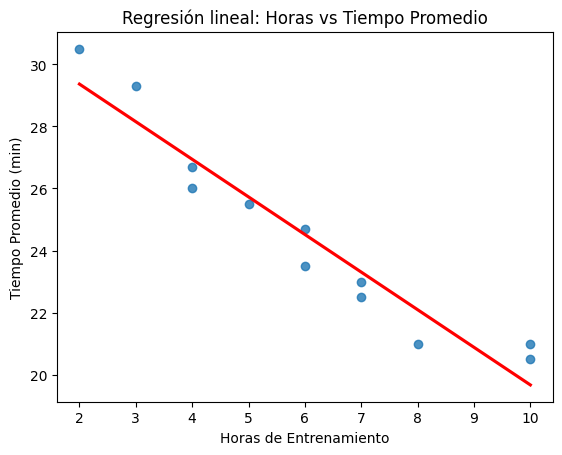

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Horas de Entrenamiento": [2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10],
    "Tiempo Promedio (min)": [
        30.5,
        29.3,
        26.7,
        26.0,
        25.5,
        24.7,
        23.5,
        23.0,
        22.5,
        21.0,
        21.0,
        20.5,
    ],
}

df = pd.DataFrame(data)

df["Horas de Entrenamiento"].corr(df["Tiempo Promedio (min)"])

sns.regplot(
    x="Horas de Entrenamiento",
    y="Tiempo Promedio (min)",
    data=df,
    ci=None,
    line_kws={"color": "red"},
)
plt.title("Regresión lineal: Horas vs Tiempo Promedio")
plt.show()

La recta sera de ayuda ya que al correlacion lineal es fuerte (negativa). Casi 1 es decir casi perfecta.

### b)

La formula de la ecuación de error cuadratico medio para regresión lineal simple es la siguiente:

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
$$

Donde:

- $MSE$ es el Error Cuadrático Medio.
- $m$ es el número de observaciones o ejemplos del conjunto de datos.
- $y_i$ es el valor real (que intenta predecir el modelo) del ejemplo $i$.
- $\hat{y}_i$ es el valor predicho por el modelo para el ejemplo $i$.


Muchas veces se encuentra así para derivar más facil:

$$
J(\beta_0, \beta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)^2
$$

donde :
$$
\hat{y}_i = \beta_0 + \beta_1 x_i
$$
Ya que las derivadas quedan así:

$$ 
\frac{\partial J}{\partial \beta_0} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)
$$
$$
\frac{\partial J}{\partial \beta_1} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right) x_i
$$

### c)
En lugar de calcular el costo con todos los datos como en el MSE clásico, en SGD se toma un único ejemplo (o un mini-lote) en cada paso.

Ofrece:

1. Mayor velocidad en datasets grandes: no necesita calcular el costo y gradiente sobre todos los datos en cada iteración, solo sobre un ejemplo.

2. Puede escapar de mínimos locales gracias al ruido que introduce la actualización estocástica.

3. Actualizaciones más frecuentes → converge más rápido en la práctica (aunque con más oscilación).

4. Permite trabajar con datasets muy grandes o en streaming, donde no podés cargar todo en memoria.

#### d) 
Utilice la técnica de descenso de gradiente estocástico para obtener los coeficientes de la recta de
regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia
fija a partir de las horas de entrenamiento semanales.

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Podemos estandarizar o no las variables pero para visualizarlo despues mejor no lo hacemos
# X = (
#     StandardScaler()
#     .fit_transform(df["Horas de Entrenamiento"].to_numpy(dtype=float).reshape(-1, 1))
#     .ravel()
# )
# y = (
#     StandardScaler()
#     .fit_transform(df["Tiempo Promedio (min)"].to_numpy(dtype=float).reshape(-1, 1))
#     .ravel()
# )
X = df["Horas de Entrenamiento"].to_numpy(dtype=float)
y = df["Tiempo Promedio (min)"].to_numpy(dtype=float)

learning = 0.0005
epochs = 5000
# b0 es la ordenada al origen y b1 la pendiente de la recta de regresion lineal simple
b0, b1 = 0.0, 0.0

rng = np.random.default_rng(42)

for epoch in range(epochs):
    # ACÁ SE DA LO DE LOS MINILOTES, TOMAMOS UNA PERMUTACION RANDOM DE LAS VARAIABLES PARA CALCULAR ERROR
    indicies = rng.permutation(len(X))
    for i in indicies:
        xi = X[i]
        yi = y[i]
        # Predicción de una variable actual
        y_pred = b0 + b1 * xi
        error = y_pred - yi
        # Actualizacion de ordenada al origen y pendiente
        b0 -= learning * error
        b1 -= learning * error * xi

# Punto de e)
X = 9
predict = b0 + b1 * X
print("Predicción para 9 horas de entrenamiento sin estandarizar:", predict)

Predicción para 9 horas de entrenamiento sin estandarizar: 21.025941162243306


# Ejercicio 4
El archivo ccpp.csv contiene 9568 datos de una central de ciclo combinado recolectados entre 2006 y 2011.
Usando la totalidad de los ejemplos se entrenaron 5 combinadores lineales con el objetivo de predecir el
valor del atributo PE correspondiente a la cantidad de energía producida a partir del atributo AT (más
detalles de este conjunto de datos aquí). Indique cuáles son los dos combinadores lineales con menor error
cuadrático promedio a la hora de predecir el valor de PE en función de AT:

a) W = -2.00 ; b= 500

b) W = -2.21 ; b= 498

c) W = -2.30 ; b= 497

d) W = -2.22 ; b=496.5

e) W = -2.16 ; b=496.91

![alt text](image-3.png)


In [11]:
import pandas as pd
import numpy as np
from ClassNeuronaLineal import NeuronaLineal

df = pd.read_csv("csv/CCPP.csv")
X = df[["AT"]].values  
y = df["PE"].values

parametros = [
    ("a", -2.00, 500),
    ("b", -2.21, 498),
    ("c", -2.30, 497),
    ("d", -2.22, 496.5),
    ("e", -2.16, 496.91),
]

resultados = []
for nombre, W, b in parametros:
    neurona = NeuronaLineal()
    neurona.w_ = np.array([W], dtype=float)
    neurona.b_ = float(b)
    y_pred = neurona.predict(X)
    mse = np.mean((y_pred - y) ** 2)
    resultados.append((nombre, W, b, mse))
    print(f"{nombre}) W={W}, b={b} -> MSE={mse:.4f}")

resultados.sort(key=lambda t: t[3])
print("\nLos dos combinadores con menor MSE son:")
for r in resultados[:2]:
    print(f"{r[0]}) W={r[1]}, b={r[2]} -> MSE={r[3]:.4f}")


a) W=-2.0, b=500 -> MSE=71.1626
b) W=-2.21, b=498 -> MSE=29.5571
c) W=-2.3, b=497 -> MSE=36.9194
d) W=-2.22, b=496.5 -> MSE=31.7856
e) W=-2.16, b=496.91 -> MSE=29.4485

Los dos combinadores con menor MSE son:
e) W=-2.16, b=496.91 -> MSE=29.4485
b) W=-2.21, b=498 -> MSE=29.5571


# Ejercicio 5
A partir de los ejemplos del archivo automobile-simple.csv, utilizado en la práctica anterior, se entrenará
un combinador lineal para predecir el precio del auto (atributo “price”) en función del tamaño del motor
(atributo “engine-size”):

a) Antes de comenzar con el entrenamiento, complete los datos faltantes del atributo “price” utilizando
el valor promedio.

b) Luego de completar según lo indicado en a), realice el entrenamiento del combinador lineal:

i. Sin normalizar los atributos.

ii. Normalizando ambos atributos linealmente.

iii. Normalizando ambos atributos utilizando media y desvío.

Analice el impacto de la normalización en el entrenamiento. ¿Qué resultados obtuvo sin normalizar los
atributos? ¿Alguna de las normalizaciones es mejor? Explique.



In [27]:
df = pd.read_csv("csv/automobile-simple.csv")
df['price'].fillna(df['price'].mean(), inplace=True)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
def train_and_get_error(X, y, alpha=0.001, n_iter=2000):
    neurona = NeuronaLineal(alpha=alpha, n_iter=n_iter, draw=0)
    neurona.fit(X, y)
    y_pred = neurona.predict(X)
    mse = np.mean((y_pred - y) ** 2)
    return neurona, mse

# Sin normalizar
X = df[['engine-size']].to_numpy(dtype=np.float64)
y = df['price'].to_numpy(dtype=np.float64).reshape(-1, 1).ravel()
neurona, mse = train_and_get_error(X, y, alpha=1e-6, n_iter=2000)
print(f"Neurona entrenada: W={neurona.w_[0]}, b={neurona.b_} -> MSE={mse:.4f}")

scaler = StandardScaler()
X = scaler.fit_transform(df[['engine-size']].to_numpy(dtype=float))
y = scaler.fit_transform(df['price'].to_numpy(dtype=float).reshape(-1, 1)).ravel()
neurona, mse = train_and_get_error(X, y)
print(f"Neurona entrenada: W={neurona.w_[0]}, b={neurona.b_} -> MSE={mse:.4f}")

scaler = MinMaxScaler()
X = scaler.fit_transform(df[['engine-size']].to_numpy(dtype=float))
y = scaler.fit_transform(df['price'].to_numpy(dtype=float).reshape(-1, 1)).ravel()
neurona, mse = train_and_get_error(X, y)
print(f"Neurona entrenada: W={neurona.w_[0]}, b={neurona.b_} -> MSE={mse:.4f}")


C:\Users\frank\AppData\Local\Temp\ipykernel_7900\155432527.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace=True)


Neurona entrenada: W=106.70895737623778, b=-269.2076423527016 -> MSE=21299342.3977
Neurona entrenada: W=0.8587734114540405, b=-0.004416692239300282 -> MSE=0.2574
Neurona entrenada: W=1.066162732527736, b=-0.065368629923976 -> MSE=0.0098


Básicamente sin normalizar cae en un minimo local y tiene terrible error, además tengo que usar un alpha muy pequeño porque sino me revienta el codigo.
Normalizado funciona mejor.

# Ejercicio 6
Utilice los scripts disponibles en la teoría y práctica para entrenar un combinador lineal. El modelo debe
recibir tres dígitos binarios y retornar la representación decimal del número que resulta de la combinación
de dígitos (para las entradas 000, 010 y 101 debe obtener las salidas 0, 2 y 5, respectivamente)
## a) Utilizando el bias o peso W0 (comportamiento normal)
## b) Utilizando únicamente las tres entradas correspondientes a los dígitos binarios anulando el bias o W0
del cálculo.
Compare la cantidad de iteraciones necesarias para obtener el vector de pesos correcto en ambos casos.
Observe el valor del arco correspondiente al bias en a).

La conclusion es sin bias es mas rapido y en este caso retrasa el entrenamiento.
El modelo sin bias tiene un mejor rendimiento en este problema ya que hay una relacion lineal directa entre las caracteristicas y la salida sonde la recta que mejor ajusta los datos pasa por el origen y no se requiere bias para desplazar la recta.

In [3]:
# Comparación completa:
# (a) Neurona lineal con bias (normal).
# (b) Neurona lineal sin bias (implementación custom).

import numpy as np

class NeuronaLineal:
    def __init__(self, alpha=0.1, n_iter=2000, cotaE=1e-10, random_state=1):
        self.alpha = alpha
        self.n_iter = n_iter
        self.cotaE = cotaE
        self.random_state = random_state

    def fit(self, X, y):
        rng = np.random.RandomState(self.random_state)
        self.w_ = rng.uniform(-0.5, 0.5, size=X.shape[1])
        self.b_ = rng.uniform(-0.5, 0.5)
        self.errors_ = []
        ErrorAnt, ErrorAct, i = 0.0, 1.0, 0
        while (i < self.n_iter) and (abs(ErrorAnt - ErrorAct) > self.cotaE):
            ErrorAnt, ErrorAct = ErrorAct, 0.0
            for xi, target in zip(X, y):
                errorXi = target - self.predict(xi)
                update = self.alpha * errorXi
                self.w_ += update * xi
                self.b_ += update
                ErrorAct += errorXi**2
            self.errors_.append(ErrorAct)
            i += 1
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

class NeuronaLinealSinBias:
    def __init__(self, alpha=0.1, n_iter=2000, cotaE=1e-10, random_state=1):
        self.alpha = alpha
        self.n_iter = n_iter
        self.cotaE = cotaE
        self.random_state = random_state

    def fit(self, X, y):
        rng = np.random.RandomState(self.random_state)
        self.w_ = rng.uniform(-0.5, 0.5, size=X.shape[1])
        self.errors_ = []
        ErrorAnt, ErrorAct, i = 0.0, 1.0, 0
        while (i < self.n_iter) and (abs(ErrorAnt - ErrorAct) > self.cotaE):
            ErrorAnt, ErrorAct = ErrorAct, 0.0
            for xi, target in zip(X, y):
                errorXi = target - self.predict(xi)
                update = self.alpha * errorXi
                self.w_ += update * xi
                ErrorAct += errorXi**2
            self.errors_.append(ErrorAct)
            i += 1
        return self

    def net_input(self, X):
        return np.dot(X, self.w_)

    def predict(self, X):
        return self.net_input(X)

# Dataset 3 bits -> decimal
bits = [(b2, b1, b0) for b2 in (0,1) for b1 in (0,1) for b0 in (0,1)]
X = np.array(bits, dtype=float)
y = np.array([4*b2 + 2*b1 + 1*b0 for (b2,b1,b0) in bits], dtype=float)

# (a) Con bias
model_a = NeuronaLineal(alpha=0.1, n_iter=2000, cotaE=1e-10, random_state=1)
model_a.fit(X, y)
y_pred_a = np.array([model_a.predict(xi) for xi in X])
mse_a = ((y - y_pred_a)**2).mean()

# (b) Sin bias
model_b = NeuronaLinealSinBias(alpha=0.1, n_iter=2000, cotaE=1e-10, random_state=1)
model_b.fit(X, y)
y_pred_b = np.array([model_b.predict(xi) for xi in X])
mse_b = ((y - y_pred_b)**2).mean()

print("=== (a) CON bias ===")
print("Pesos:", model_a.w_)
print("Bias:", model_a.b_)
print("Épocas:", len(model_a.errors_))
print("MSE:", mse_a)
print("Exactitud entera:", np.all(np.rint(y_pred_a).astype(int) == y))

print("\n=== (b) SIN bias ===")
print("Pesos:", model_b.w_)
print("Bias inexistente (fijado en 0)")
print("Épocas:", len(model_b.errors_))
print("MSE:", mse_b)
print("Exactitud entera:", np.all(np.rint(y_pred_b).astype(int) == y))


=== (a) CON bias ===
Pesos: [3.99999469 1.99999445 0.99999441]
Bias: 1.1865133568081707e-05
Épocas: 104
MSE: 3.581417835805094e-11
Exactitud entera: True

=== (b) SIN bias ===
Pesos: [3.99999418 2.00000127 1.00000486]
Bias inexistente (fijado en 0)
Épocas: 58
MSE: 1.4811229315512144e-11
Exactitud entera: True


# Ejercicio 7
Utilizando los atributos numéricos del archivo Autos.csv entrene un combinador lineal para predecir el
precio del auto en función del resto de los atributos. Tenga en cuenta la existencia de valores faltantes.
Realice varias ejecuciones y observe los vectores de pesos obtenidos. ¿Puede identificar cuáles son los
atributos con mayor incidencia en la determinación del precio? Explique.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from ClassNeuronaLineal import NeuronaLineal

df = pd.read_csv("csv/autos.csv", na_values=["?"])

num_known = [
    "symboling","normalized-losses","wheel-base","length","width","height",
    "curb-weight","engine-size","bore","stroke","compression-ratio",
    "horsepower","peak-rpm","city-mpg","highway-mpg","price"
]
for c in num_known:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

y = df["price"]
X = df.drop(columns=["price"])

num_proc = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
cat_proc = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

pre = ColumnTransformer(
    transformers=[
        ("num", num_proc, selector(dtype_include=np.number)),
        ("cat", cat_proc, selector(dtype_exclude=np.number)),
    ],
    remainder="drop"
)

mask_train = y.notna()
X_known = X.loc[mask_train].copy()
X_missing = X.loc[~mask_train].copy()
y_known = y.loc[mask_train].astype(float).to_numpy()

Xk = pre.fit_transform(X_known)
Xm = pre.transform(X_missing) if len(X_missing) else np.empty((0, Xk.shape[1]))

feat_names = pre.get_feature_names_out()
Xk_df = pd.DataFrame(Xk, columns=feat_names, index=X_known.index)
Xm_df = pd.DataFrame(Xm, columns=feat_names, index=X_missing.index)

print("Columnas transformadas (muestra):")
print(Xk_df.columns[:30])

model = NeuronaLineal(alpha=0.001, n_iter=500, cotaE=1e-10, random_state=42, draw=0)
model.fit(Xk_df.to_numpy(), y_known)

yhat_train = np.array([model.predict(x) for x in Xk_df.to_numpy()], dtype=float)
mse_train = float(np.mean((y_known - yhat_train) ** 2))
print("MSE train:", round(mse_train, 2))

if len(Xm_df):
    y_missing_hat = np.array([model.predict(x) for x in Xm_df.to_numpy()], dtype=float)
    df.loc[~mask_train, "price_estimated"] = y_missing_hat
df["price_filled"] = df["price"].fillna(df["price_estimated"])
df.to_csv("autos_with_price_filled.csv", index=False)


Columnas transformadas (muestra):
Index(['num__symboling', 'num__normalized-losses', 'num__wheel-base',
       'num__length', 'num__width', 'num__height', 'num__curb-weight',
       'num__engine-size', 'num__bore', 'num__stroke',
       'num__compression-ratio', 'num__horsepower', 'num__peak-rpm',
       'num__city-mpg', 'num__highway-mpg', 'cat__make_alfa-romero',
       'cat__make_audi', 'cat__make_bmw', 'cat__make_chevrolet',
       'cat__make_dodge', 'cat__make_honda', 'cat__make_isuzu',
       'cat__make_jaguar', 'cat__make_mazda', 'cat__make_mercedes-benz',
       'cat__make_mercury', 'cat__make_mitsubishi', 'cat__make_nissan',
       'cat__make_peugot', 'cat__make_plymouth'],
      dtype='object')
MSE train: 2573607.51


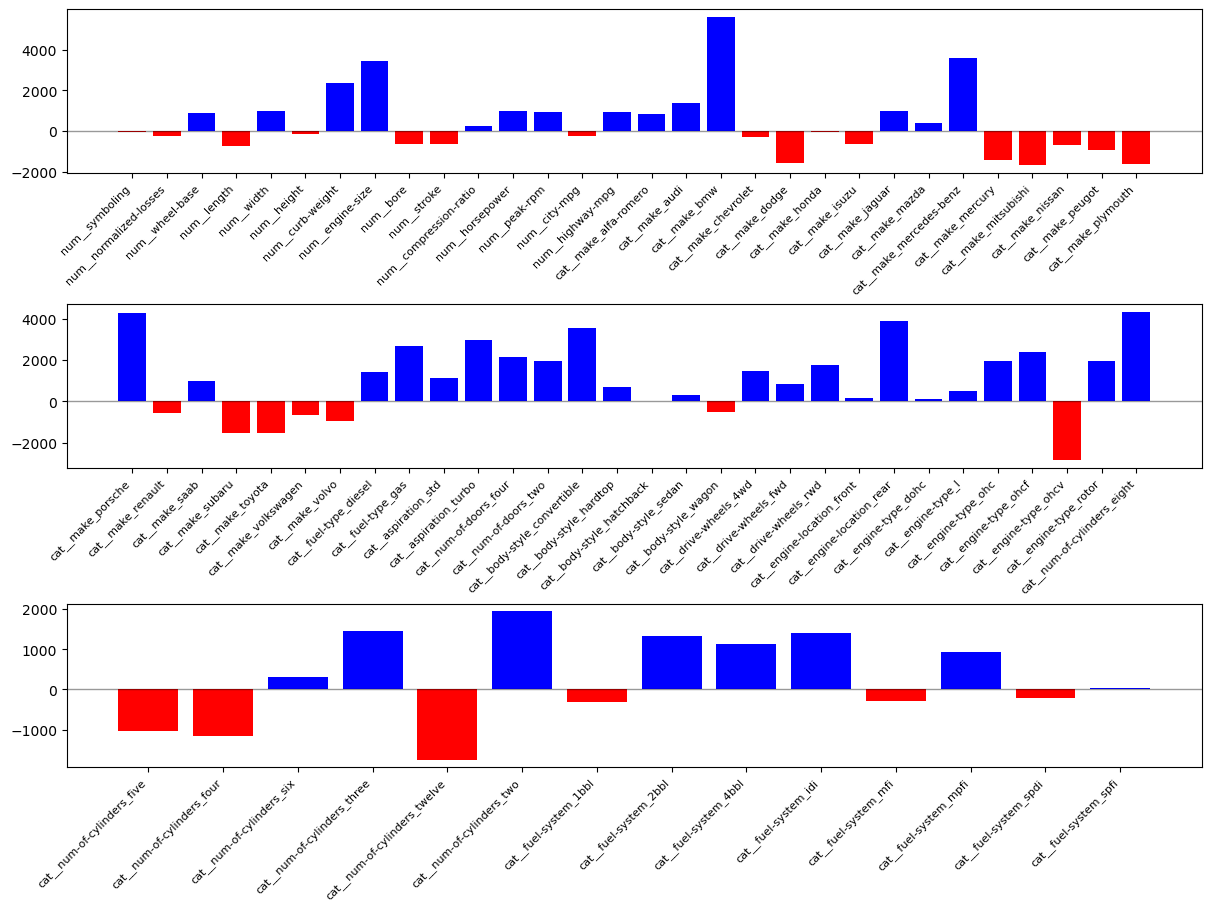

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = np.asarray(model.w_, dtype=float)
names = list(pre.get_feature_names_out())

group_size = 30
n_groups = int(np.ceil(len(w)/group_size))
fig, axes = plt.subplots(n_groups, 1, figsize=(12, 3*n_groups), constrained_layout=True)
axes = [axes] if n_groups == 1 else axes

for gi, ax in enumerate(axes):
    s, e = gi*group_size, min((gi+1)*group_size, len(w))
    ws, ls = w[s:e], names[s:e]
    idx = np.arange(len(ws))
    ax.bar(idx, ws, color=np.where(ws<0, "red", "blue"))
    ax.set_xticks(idx); ax.set_xticklabels(ls, rotation=45, ha="right", fontsize=8)
    ax.axhline(0, lw=1, color="k", alpha=0.4)
plt.show()


Aquellos atributos cuyo valor absoluto del peso es mayor a 0 son los que más afectan al precio. Es decir, mientras mayor sea el valor absoluto del coeficiente asociado a un atributo en el modelo entrenado, mayor es su incidencia en la predicción del precio.

# Ejercicio 8
El archivo semillas.csv contiene información de granos que pertenecen a tres variedades diferentes de
trigo. Entrene una neurona no lineal para determinar si una semilla es de “TIPO 2” o no. Divida el 60% de los
ejemplos para entrenar y el 40% para realizar el testeo. Antes de entrenar, normalice todos los atributos
numéricos aplicando media y desvío.
Realice los siguientes experimentos con el fin de analizar cómo distintos hiperparámetros afectan la
convergencia y el desempeño del modelo:
## a) Lleve a cabo 20 experimentos, utilizando la función sigmoide, variando la tasa de aprendizaje desde α = 0.04, incrementando en pasos de 0.04 (es decir, α = 0.04, 0.08, ..., hasta 0.80). En cada experimento, registre: curva de error (error por iteración), curva de accuracy (precisión por iteración), cantidad total de iteraciones realizadas, la iteración en la que se alcanzó el 100% de accuracy.
## b) Replique el punto a) utilizando tangente hiperbólica.
## c) Compare y analice los resultados obtenidos a) y b).

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from ClassNeuronaGral import NeuronaGradiente
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("csv/semillas.csv")
scalers = [StandardScaler() for i in range(len(df.columns)-1)]
for col, scaler in zip(df.columns[:-1], scalers):
    df[col] = scaler.fit_transform(df[[col]])

X = df[df.columns[:-1]].to_numpy(dtype=float)
labelizer = LabelEncoder()
y_raw = labelizer.fit_transform(df[df.columns[-1]])

In [10]:
def preparar_labels(fun, y_raw):
    if fun == "sigmoid":
        y = np.where(y_raw == 2, 1, 0)   # 0/1
        costo = "EC_binaria"
    elif fun == "tanh":
        y = np.where(y_raw == 2, 1, -1)  # -1/+1
        costo = "EC"
    else:
        raise ValueError("fun debe ser 'sigmoid' o 'tanh'")
    return y, costo

def correr_experimentos(fun):
    resultados = []
    alphas = np.arange(0.04, 0.84, 0.04)
    y, costo = preparar_labels(fun, y_raw)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.6, stratify=y, random_state=42
    )
    for alpha in alphas:

        model = NeuronaGradiente(alpha=alpha, n_iter=20, cotaE=1e-8, FUN=fun, random_state=42)
        model.fit(X_train, y_train)
        # métricas
        errores = model.errors_
        accs = model.accuracy_
        total_iters = len(errores)
        try:
            iter_100 = next(i for i,a in enumerate(accs) if a==1.0)
        except StopIteration:
            iter_100 = None
        test_acc = model.accuracy(X_test, y_test)
        resultados.append({
            "alpha": alpha,
            "iters": total_iters,
            "iter_100": iter_100,
            "final_acc_train": accs[-1],
            "final_acc_test": test_acc,
            "errors": errores,
            "accs": accs
        })
    return resultados
print("Calculando sigmoide")
res_sig = correr_experimentos("sigmoid")
print("Calculando tanh")
res_tanh = correr_experimentos("tanh")

Calculando sigmoide
Calculando tanh


Resumen Sigmoid: [{'alpha': np.float64(0.04), 'iters': 20, 'iter_100': None, 'final_acc_train': np.float64(0.9523809523809523), 'final_acc_test': np.float64(0.9404761904761905), 'errors': [np.float64(29.63105195492471), np.float64(18.637635213338864), np.float64(14.06131936164237), np.float64(11.455014013994795), np.float64(9.872367104168724), np.float64(8.841584270712833), np.float64(8.123630558278883), np.float64(7.595108666967074), np.float64(7.188809966727379), np.float64(6.865748605330604), np.float64(6.601934458629275), np.float64(6.381832246575536), np.float64(6.194940968218327), np.float64(6.033903408922973), np.float64(5.8934073637301525), np.float64(5.769518080309776), np.float64(5.659256748655519), np.float64(5.560325293290944), np.float64(5.470921376123895), np.float64(5.38961082874287)], 'accs': [np.float64(0.7142857142857143), np.float64(0.8015873015873016), np.float64(0.8968253968253969), np.float64(0.9285714285714286), np.float64(0.9365079365079365), np.float64(0.944444

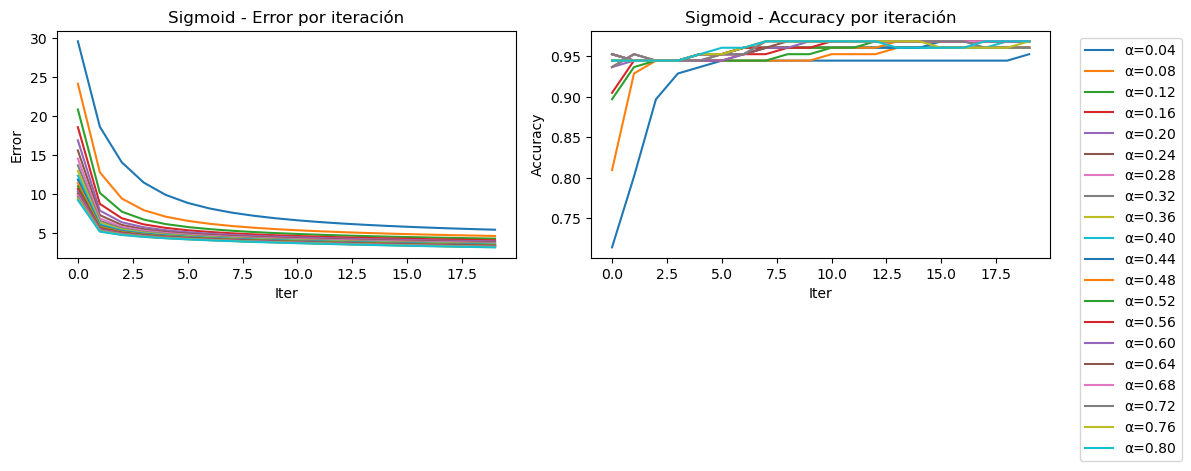

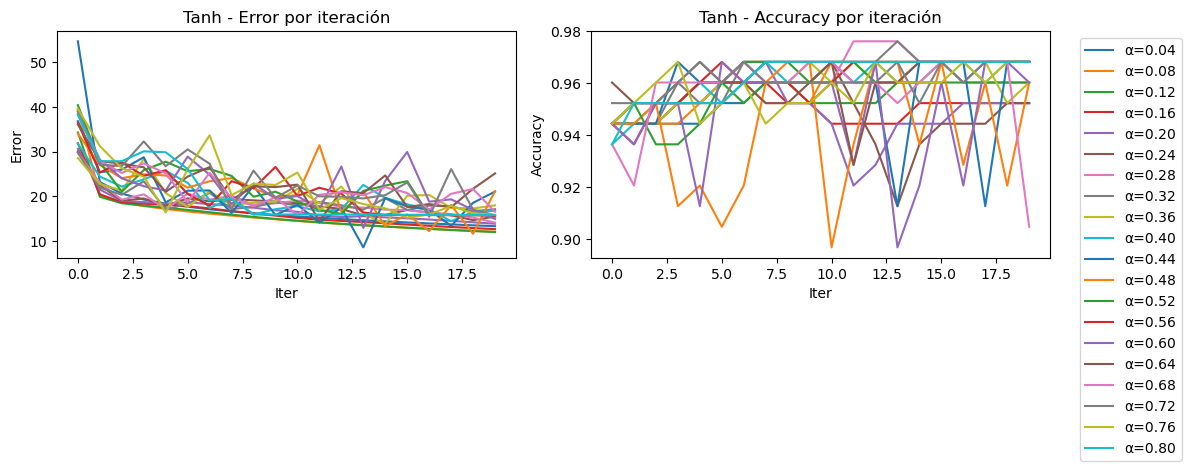

In [11]:
print("Resumen Sigmoid:", res_sig)
print("Resumen tanh", res_tanh)
def plot_curvas(res, titulo):
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    for r in res:
        axes[0].plot(r["errors"], label=f"α={r['alpha']:.2f}")
        axes[1].plot(r["accs"], label=f"α={r['alpha']:.2f}")
    axes[0].set_title(f"{titulo} - Error por iteración"); axes[0].set_xlabel("Iter"); axes[0].set_ylabel("Error")
    axes[1].set_title(f"{titulo} - Accuracy por iteración"); axes[1].set_xlabel("Iter"); axes[1].set_ylabel("Accuracy")
    axes[1].legend(bbox_to_anchor=(1.05,1), loc="upper left")
    plt.tight_layout(); plt.show()

plot_curvas(res_sig, "Sigmoid")
plot_curvas(res_tanh, "Tanh")

## **Sigmoide (labels 0/1, costo binario)**

* **Error**: desciende de forma suave y estable, con curvas limpias en todas las tasas de aprendizaje.
* **Accuracy**: empieza bajo (en α muy chico \~0.7) y sube rápidamente; en pocas iteraciones todas las curvas superan 0.9 y convergen cerca de **0.95–0.97**.
* **Efecto de α**: con α bajo (0.04, 0.08) tarda más en llegar, con α > 0.2 converge muy rápido.
* **Conclusión**: aprendizaje muy estable, sin oscilaciones grandes; siempre alcanza un desempeño alto.

---

## **Tanh (labels -1/+1, costo EC)**

* **Error**: también desciende, pero con bastante más ruido (oscilaciones en cada curva).
* **Accuracy**: arranca ya en \~0.9 y se mantiene alrededor de **0.94–0.97**, con picos y caídas, pero sin degradarse del todo.
* **Efecto de α**: las curvas son más irregulares, pero ninguna diverge. La elección de α no cambia tanto la accuracy final, aunque algunas (ej. 0.08, 0.32) tienen bajones más notables.
* **Conclusión**: la tanh entrena y logra muy buena accuracy, pero de forma menos suave que la sigmoide.

---

## **Comparación global**

* Ambas funciones logran **desempeños muy similares** en accuracy final (≈0.95).
* **Sigmoide** ofrece entrenamiento más estable y predecible → error suave, accuracy creciendo de manera limpia.
* **Tanh** también funciona bien una vez corregidos los labels, pero muestra oscilaciones en error y accuracy → es más sensible al α y al ruido numérico.
* En general, para este dataset y configuración:

  * **Sigmoide** es la opción más robusta.
  * **Tanh** funciona pero puede necesitar tuning extra (α más pequeño o más iteraciones) para suavizar la convergencia.

# Ejercicio 9

Se ha realizado un análisis químico a tres tipos distintos de vinos producidos en una misma región de Italia.  
El número de muestras considerado es el siguiente:  
- Tipo 1 ➔ 59 muestras  
- Tipo 2 ➔ 71 muestras  
- Tipo 3 ➔ 48 muestras  

El archivo **vinos.csv** permite observar los resultados de este análisis. Cada fila representa una muestra distinta y está formada, en primer lugar, por el número del tipo al cual pertenece el vino analizado seguido por los 13 atributos que lo caracterizan.  

Por ejemplo, la siguiente fila:  
  2, 12.29, 3.17, 2.21, 18, 88, 2.85, 2.99, 0.45, 2.81, 2.3, 1.42, 2.83, 406


es el resultado del análisis de un vino correspondiente al tipo 2 (1er valor de la fila) seguido por 13 valores separados por comas que indican los niveles de las mediciones realizadas a dicho vino.

---

## a)  
Entrene una **red neuronal formada por una única neurona** para clasificar los vinos de **Tipo 1**.  
Realice **30 ejecuciones independientes** utilizando el **50%, 60%, 70%, 80% y 90%** de los ejemplos como entrenamiento y el resto como testeo.  

Para cada porcentaje, indique:  
- La cantidad promedio de ejemplos correctamente clasificados en entrenamiento y en testeo.  
- El promedio y el desvío de la cantidad de iteraciones realizadas.  

Utilice:  
- Un máximo de **400 iteraciones**  
- Velocidades de aprendizaje: **0.1, 0.2 y 0.3**

Analice los resultados obtenidos utilizando:  
1. Función de activación **sigmoid** y función de costo **ECM** (error cuadrático medio).  
2. Función de activación **sigmoid** y función de costo **EC_binaria** (entropía cruzada binaria).  
3. Función de activación **tanh** y función de costo **ECM** (error cuadrático medio).


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ClassNeuronaGral import NeuronaGradiente

# === Carga y preparación ===
df = pd.read_csv("csv/Vinos.csv", delimiter=";")
X = df.drop(columns=["Class"]).to_numpy(dtype=float)

# Estandarización (media 0, desvío 1)
X = StandardScaler().fit_transform(X)

# Etiquetas para cada activación (positivo: Tipo 1)
y_sig = (df["Class"].to_numpy() == 1).astype(float)    # {0,1}
y_tnh = np.where(df["Class"].to_numpy() == 1, 1.0, -1.0)  # {-1,+1}

configs = [
    ("sigmoid", "ECM",        y_sig),
    ("sigmoid", "EC_binaria", y_sig),
    ("tanh",    "ECM",        y_tnh),
]

train_fracs = [0.5, 0.6, 0.7, 0.8, 0.9]
alphas = [0.1, 0.2, 0.3]
n_runs = 30
max_iter = 40

rows = []

for train_frac in train_fracs:
    for FUN, COSTO, y in configs:
        for alpha in alphas:
            train_correct, test_correct, n_iters = [], [], []
            for seed in range(n_runs):
                Xtr, Xte, ytr, yte = train_test_split(
                    X, y, train_size=train_frac, stratify=y, random_state=seed
                )
                model = NeuronaGradiente(alpha=alpha, n_iter=max_iter, cotaE=1e-8,
                                         FUN=FUN, COSTO=COSTO, random_state=seed)
                model.fit(Xtr, ytr)

                # #correctos = accuracy * cantidad
                acc_tr = float(model.accuracy(Xtr, ytr))
                acc_te = float(model.accuracy(Xte, yte))
                train_correct.append(acc_tr * len(Xtr))
                test_correct.append(acc_te * len(Xte))
                n_iters.append(len(getattr(model, "errors_", [])))

                rows.append({
                    "train_pct": train_frac,
                    "FUN": FUN,
                    "COSTO": COSTO,
                    "alpha": alpha,
                    "mean_train_acc_%": np.mean(train_correct) * 100 / len(Xtr),
                    "mean_test_acc_%": np.mean(test_correct) * 100 / len(Xte),
                    "mean_iters": np.mean(n_iters),
                    "std_iters": np.std(n_iters, ddof=1)
                })

                print(f"Config: train%={train_frac}, FUN={FUN}, COSTO={COSTO}, alpha={alpha} -> "
                    f"train_acc={np.mean(train_correct) * 100 / len(Xtr):.2f}%, "
                    f"test_acc={np.mean(test_correct) * 100 / len(Xte):.2f}%, "
                    f"mean_iters={np.mean(n_iters):.1f} ± {np.std(n_iters, ddof=1):.1f}")

results = pd.DataFrame(rows).sort_values(["train_pct","FUN","COSTO","alpha"]).reset_index(drop=True)

print(results)


/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=97.75%, mean_iters=40.0 ± nan
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=97.75%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=98.50%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.10%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.04%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.16%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=97.75%, mean_iters=40.0 ± nan
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=97.75%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.50%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.10%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.04%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.16%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=97.75%, mean_iters=40.0 ± nan
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=97.75%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.50%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.10%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.04%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.16%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=98.50%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.10%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.04%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.16%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.00%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.10%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=97.75%, mean_iters=40.0 ± nan
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=97.75%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=98.50%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=99.10%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=99.04%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=99.16%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=97.75%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=98.50%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=99.10%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=99.04%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=99.16%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=99.00%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=98.50%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.10%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.04%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.16%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.00%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.10%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.18%, mean_iters=40.

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=97.75%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.50%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.72%, test_acc=98.03%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.78%, test_acc=98.20%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.81%, test_acc=98.13%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.84%, test_acc=98.39%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.86%, test_acc=98.60%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.88%, test_acc=98.50%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.89%, test_acc=98.65%, mean_iters=40.0 ± 0.0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.50%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.72%, test_acc=98.03%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.78%, test_acc=98.43%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.81%, test_acc=98.69%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.84%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.86%, test_acc=99.02%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.88%, test_acc=98.88%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.89%, test_acc=98.99%, mean_iters=40.0 ± 0.0
Config: train%=0.5, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.90%, test_acc=99.08%, mean_iters=40.0 ± 0.0


/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± nan
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=98.15%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=98.89%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.07%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.21%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.31%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.15%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.89%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.84%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.01%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.13%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.23%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.31%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± nan
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.15%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.89%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.84%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.01%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.13%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± nan
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=98.15%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=98.89%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.07%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.21%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.31%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± nan
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=98.15%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=98.89%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=98.84%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=99.01%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=99.13%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± nan
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=98.15%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=98.89%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=98.84%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=99.01%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=99.13%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=97.92%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=98.96%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.17%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.07%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.21%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.31%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.38%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.44%, mean_iters=40.

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=97.92%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.96%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.89%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.84%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.01%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.13%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.23%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.31%, mean_iters=40.

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± nan
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=97.92%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.96%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.89%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.07%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.21%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.31%, mean_iters=40.0 ± 0.0
Config: train%=0.6, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.23%, mean_iters=40.

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.54%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.63%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.69%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.74%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.77%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, t

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.54%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.63%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.69%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.74%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.77%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.59%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FU

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=99.79%, mean_iters=40.0 ± 0.0
Config: train%=0.

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.15%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.77%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.07%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.89%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.07%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.21%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.31%, mean_iters=40.0 ± 0.0
Config: train%=0.7, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.38%, mean_iters=40

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.31%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.44%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.54%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.60%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=99.65%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, t

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.69%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.31%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.44%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.54%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.60%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.65%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.38%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=99.44%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=99.69%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=99.72%, mean_iters=40.0 ± 0.0
Config: train%=0.8

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.07%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.82%, test_acc=97.22%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.86%, test_acc=97.22%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.88%, test_acc=97.69%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.90%, test_acc=98.02%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.91%, test_acc=98.26%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=99.92%, test_acc=98.15%, mean_iters=40.0 ± 0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± nan
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=99.07%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.82%, test_acc=97.92%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.86%, test_acc=98.33%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.88%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.90%, test_acc=98.81%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.91%, test_acc=98.96%, mean_iters=40.0 ± 0.0
Config: train%=0.8, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=99.92%, test_acc=98.77%, mean_iters=40.0 ± 0.

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.1 -> train_acc=100.0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.2 -> train_acc=100.0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=ECM, alpha=0.3 -> train_acc=100.0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.2 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=sigmoid, COSTO=EC_binaria, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.1 -> train_acc=100.00%, test_acc=100.00%, mean_

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=94.44%, mean_iters=40.0 ± nan
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=97.22%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.15%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.61%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=98.89%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.07%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.21%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.31%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.2 -> train_acc=100.00%, test_acc=99.38%, mean_iters=40.

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± nan
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_iters=40.0 ± 0.0
Config: train%=0.9, FUN=tanh, COSTO=ECM, alpha=0.3 -> train_acc=100.00%, test_acc=100.00%, mean_

# Ejercicio 10
A partir de los ejemplos del archivo automobile-simple.csv, utilice todos los ejemplos para generar un
modelo de 1 neurona para clasificar si un auto es ecológico:

a) Elimine los registros que presenten valores faltantes y utilice el atributo eco-rating para generar un
nuevo atributo binario que determine si un auto es ecológico o no. Considere que un auto es
ecológico si el valor de "eco-rating" supera la media de dicho atributo.
b) Luego de completar según lo indicado en a), aplique normalización y realice el entrenamiento
utilizando los atributos numéricos:
i. Utilizando salida sigmoide (sigmoid) para la neurona.
ii. Utilizando salida tangente hiperbólico (tanh) para la neurona.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from ClassNeuronaGral import NeuronaGradiente

df = pd.read_csv("csv/automobile-simple.csv")
df = df.dropna(axis=0)  # eliminar filas con NA

threshold = df["eco-rating"].mean()
df["eco"] = (df["eco-rating"] > threshold).astype(int)

X = df[["curb-weight","engine-size","horsepower","city-mpg","highway-mpg","price","volume"]].to_numpy(dtype=float)
y_sig = df["eco"].to_numpy(dtype=float)  # para sigmoide (0/1)
y_tanh = np.where(df["eco"]==1, 1.0, -1.0)  # para tanh (-1/+1)

X = StandardScaler().fit_transform(X)

model_sig = NeuronaGradiente(alpha=0.1, n_iter=400, cotaE=1e-8,
                             FUN="sigmoid", COSTO="EC_binaria", random_state=42)
model_sig.fit(X, y_sig)
acc_train_sig = model_sig.accuracy(X, y_sig)
print(f"Sigmoid -> Accuracy train: {acc_train_sig:.2%}, Iteraciones: {len(model_sig.errors_)}")

# === ii. Tanh ===
model_tanh = NeuronaGradiente(alpha=0.1, n_iter=400, cotaE=1e-8,
                              FUN="tanh", COSTO="EC", random_state=42)
model_tanh.fit(X, y_tanh)
acc_train_tanh = model_tanh.accuracy(X, y_tanh)
print(f"Tanh    -> Accuracy train: {acc_train_tanh:.2%}, Iteraciones: {len(model_tanh.errors_)}")


Sigmoid -> Accuracy train: 99.49%, Iteraciones: 400
Tanh    -> Accuracy train: 96.45%, Iteraciones: 1


/home/kelisei/Desktop/4to-anio-unlp-sistemas/deeplearning/ClassNeuronaGral.py:107: RuntimeWarning: invalid value encountered in log
  return(-y*np.log(y_hat+EPS))


# Regresión Logística multiclase
# Ejercicio 11
Se busca predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica
es el habitual o no. Se dispone de información correspondiente a las historias clínicas de pacientes
atendidos previamente

a) Numerice los atributos nominales y utilice el archivo drug_train.csv para entrenar un modelo con 5
neuronas que sea capaz de predecir el tipo de fármaco que se debe administrar a un paciente afectado
de rinitis alérgica.

b) Luego utilice el archivo drug_test.csv para medir la calidad del modelo

In [22]:
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

train = pd.read_csv("csv/drugs_train.csv")
test = pd.read_csv("csv/drugs_test.csv")

X_train = train.drop(columns=["Drug"])
y_train = train["Drug"]

X_test = test.drop(columns=["Drug"])
y_test = test["Drug"]

pre = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), selector(dtype_include=["int64","float64"])),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), selector(dtype_exclude=["int64","float64"]))
    ]
)

clf = Pipeline(steps=[
    ("pre", pre),
    ("logreg", LogisticRegression(max_iter=1000, multi_class="multinomial"))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy en test: {acc:.2%}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy en test: 95.00%

Reporte de clasificación:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.82      0.90        11
       drugY       0.90      1.00      0.95        18

    accuracy                           0.95        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.96      0.95      0.95        40



/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Ejercicio 12
Utilice una red neuronal formada por una única capa de salida de 3 neuronas para clasificar las muestras de
vino del archivo Vinos.csv descripto en el ejercicio anterior.
Realice 30 ejecuciones independientes utilizando el 60% y 80% de los ejemplos como entrenamiento y el
resto como testeo.
Utilice un máximo de 400 iteraciones y velocidades de aprendizaje 0.1, 0.2 y 0.3.
Complete la siguiente tabla con los resultados de las siguientes configuraciones
## a) Función de activación ‘sigmoid’ y función de costo ‘ECM’ (error cuadrático medio)
## b) Función de activación ‘sigmoid’ y función de costo ‘EC_binaria’ (entropía cruzada binaria)
## c) Función de activación ‘tanh’ y función de costo ‘ECM’ (error cuadrático medio)
## d) Capa ‘Softmax’ y función de costo ‘EC’ (entropía cruzada)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ClassRNMulticlase import RNMulticlase

df = pd.read_csv("csv/Vinos.csv", delimiter=";")
X = df.drop(columns=["Class"]).to_numpy(dtype=float)
y_raw = df["Class"].astype(int).to_numpy()  # valores {1,2,3}

classes = np.array([1,2,3])
class_to_idx = {c:i for i,c in enumerate(classes)}
y_idx = np.vectorize(class_to_idx.get)(y_raw)
y = np.eye(len(classes))[y_idx]  # shape (n,3)

train_fracs = [0.6, 0.8]
alphas = [0.1, 0.2, 0.3]
n_runs = 30
max_iter = 40
cotaE = 1e-8

configs = {
    "a": {"FUN":"sigmoid", "COSTO":"ECM"},
    "b": {"FUN":"sigmoid", "COSTO":"EC_binaria"},
    "c": {"FUN":"tanh",    "COSTO":"ECM"},
    "d": {"FUN":"softmax", "COSTO":"EC"},
}

rows = []
for tr in train_fracs:
    for cfg_key, cfg in configs.items():
        for alpha in alphas:
            acc_tr_list, acc_te_list, it_list = [], [], []
            for seed in range(n_runs):
                Xtr, Xte, ytr, yte, yraw_tr, yraw_te = train_test_split(
                    X, y, y_raw, train_size=tr, stratify=y_raw, random_state=seed
                )

                # Normalización (fit solo en train)
                scaler = StandardScaler().fit(Xtr)
                Xtr_n = scaler.transform(Xtr)
                Xte_n = scaler.transform(Xte)

                # Modelo
                model = RNMulticlase(
                    alpha=alpha, n_iter=max_iter, cotaE=cotaE,
                    FUN=cfg["FUN"], COSTO=cfg["COSTO"], random_state=seed
                )
                model.fit(Xtr_n, ytr)

                # Accuracy (usa y one-hot)
                acc_tr = model.accuracy(Xtr_n, ytr)
                acc_te = model.accuracy(Xte_n, yte)
                acc_tr_list.append(acc_tr)
                acc_te_list.append(acc_te)
                it_list.append(len(model.errors_))

            rows.append({
                "train_pct": tr,
                "config": cfg_key,
                "FUN": cfg["FUN"],
                "COSTO": cfg["COSTO"],
                "alpha": alpha,
                "mean_acc_train_%": float(np.mean(acc_tr_list)*100.0),
                "mean_acc_test_%":  float(np.mean(acc_te_list)*100.0),
                "mean_iters": float(np.mean(it_list)),
                "std_iters":  float(np.std(it_list, ddof=1))
            })
            print(f"[cfg={cfg_key} | train={tr:.1f} | α={alpha:.2f}] "
                  f"train={np.mean(acc_tr_list)*100:.2f}% | test={np.mean(acc_te_list)*100:.2f}% | "
                  f"iters={np.mean(it_list):.1f}±{np.std(it_list, ddof=1):.1f}")

results = pd.DataFrame(rows).sort_values(["train_pct","config","alpha"]).reset_index(drop=True)
print("\n=== Resumen ===")
display(results)



[cfg=a | train=0.6 | α=0.10] train=98.81% | test=93.98% | iters=40.0±0.0
[cfg=a | train=0.6 | α=0.20] train=99.03% | test=93.33% | iters=40.0±0.0
[cfg=a | train=0.6 | α=0.30] train=99.06% | test=92.55% | iters=40.0±0.0
[cfg=b | train=0.6 | α=0.10] train=98.81% | test=93.84% | iters=40.0±0.0
[cfg=b | train=0.6 | α=0.20] train=99.03% | test=93.24% | iters=40.0±0.0
[cfg=b | train=0.6 | α=0.30] train=99.06% | test=92.69% | iters=40.0±0.0
[cfg=c | train=0.6 | α=0.10] train=53.90% | test=54.12% | iters=32.1±6.9
[cfg=c | train=0.6 | α=0.20] train=55.00% | test=53.33% | iters=40.0±0.0
[cfg=c | train=0.6 | α=0.30] train=56.13% | test=55.23% | iters=40.0±0.0
[cfg=d | train=0.6 | α=0.10] train=99.06% | test=92.50% | iters=40.0±0.0
[cfg=d | train=0.6 | α=0.20] train=98.93% | test=91.57% | iters=40.0±0.0
[cfg=d | train=0.6 | α=0.30] train=98.62% | test=90.51% | iters=40.0±0.0
[cfg=a | train=0.8 | α=0.10] train=98.15% | test=94.91% | iters=40.0±0.0
[cfg=a | train=0.8 | α=0.20] train=98.73% | test=94